In [3]:
import numpy as np 

a = np.identity(3)

In [4]:
a

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [5]:
np.random.beta(5, 5, size=3)

array([0.45360905, 0.55323443, 0.59857035])

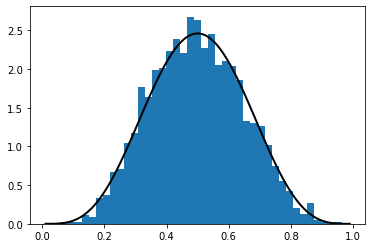

In [6]:
from scipy.stats import beta
import matplotlib.pyplot as plt 
%matplotlib inline

q = beta(5, 5)
obs = q.rvs(2000)
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots()
ax.hist(obs, bins=40, density=True)
ax.plot(grid, q.pdf(grid), 'k-', linewidth=2)
plt.show()

In [7]:
q.cdf(0.4)

0.26656768000000003

In [8]:
q.ppf(0.8)

0.6339134834642708

In [9]:
q.mean()

0.5

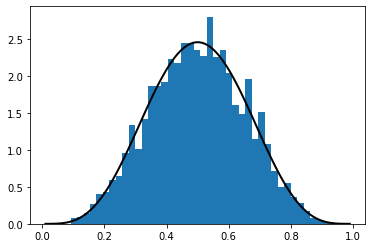

"\nq = beta(5, 5)\nobs = q.rvs(2000)\ngrid = np.linspace(0.01, 0.99, 100)\n\nfig, ax = plt.subplots()\nax.hist(obs, bins=40, density=True)\nax.plot(grid, q.pdf(grid), 'k-', linewidth=2)\nplt.show()\n\n"

In [10]:
obs = beta.rvs(5, 5, size=2000)
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots()
ax.hist(obs, bins=40, density=True)
ax.plot(grid, beta.pdf(grid, 5, 5), 'k-', linewidth=2)
plt.show()
'''
q = beta(5, 5)
obs = q.rvs(2000)
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots()
ax.hist(obs, bins=40, density=True)
ax.plot(grid, q.pdf(grid), 'k-', linewidth=2)
plt.show()

'''

In [11]:
from scipy.stats import linregress

x = np.random.randn(200)
y = 2 * x + 0.1 * np.random.randn(200)
gradient, intercept, r_value, p_value, std_err = linregress(x, y)
print(gradient, intercept, r_value, p_value, std_err)

1.9990992882060226 -0.0007792987974731156 0.9988924849904344 8.361844553665361e-265 0.006691947906908943


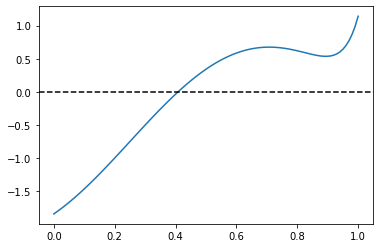

In [12]:
f = lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1
x = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
ax.plot(x, f(x))
ax.axhline(ls="--", c="k")
plt.show()

In [13]:
# Bisection 二分法
def bisect(f, a, b, tol=10e-5):

    lower, upper = a, b
    while upper - lower > tol:
        middle = 0.5 * (upper + lower)
        if f(middle) > 0:
            lower, upper = lower, middle
        else:
            lower, upper = middle, upper
    return 0.5 * (upper + lower)

In [14]:
bisect(f, 0, 1)

0.408294677734375

In [15]:
from scipy.optimize import bisect
bisect(f, 0, 1)

0.4082935042806639

In [16]:
from scipy.optimize import newton
newton(f, 0.2)

0.40829350427935673

In [17]:
newton(f, 0.7) # failure of convergence

0.7001700000000279

In [18]:
from scipy.optimize import brentq
brentq(f, 0, 1)

0.40829350427936706

In [19]:
%timeit brentq(f, 0, 1)

27.4 µs ± 1.93 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [20]:
%timeit bisect(f, 0, 1)

107 µs ± 7.03 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [21]:
from scipy.optimize import fixed_point
fixed_point(lambda x: x**2, 10.0)

array(1.)

In [22]:
from scipy.optimize import fminbound
fminbound(lambda x: x**2, -1, 2)

0.0

In [23]:
from scipy.integrate import quad

integral, error = quad(lambda x: x**2, 0, 1)
integral

0.33333333333333337

In [28]:
def bisect(f, a, b, tol=10e-5):
    lower, upper = a, b 
    if upper - lower < tol:
        return 0.5 * (upper + lower)
    else:
        middle = 0.5 * (upper + lower)
        print(f'Current mid point = {middle}')
        if f(middle) > 0:
            return bisect(f, lower, middle)
        else:
            return bisect(f, middle, upper)

In [30]:
f = lambda x: np.sin(4 * (x - 0.25)) + x + x**20 -1
bisect(f, 0, 1)

Current mid point = 0.5
Current mid point = 0.25
Current mid point = 0.375
Current mid point = 0.4375
Current mid point = 0.40625
Current mid point = 0.421875
Current mid point = 0.4140625
Current mid point = 0.41015625
Current mid point = 0.408203125
Current mid point = 0.4091796875
Current mid point = 0.40869140625
Current mid point = 0.408447265625
Current mid point = 0.4083251953125
Current mid point = 0.40826416015625


0.408294677734375